# BRAZILIAN E-COMMERCE CUSTOMER SEGMENTATION
Data source : [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data)

## Overview

This project focuses on analyzing the Brazilian E-Commerce Public Dataset by Olist from 2016 to 2018. Through the application of the RFM (Recency, Frequency, Monetary) model, we aim to segment customers based on their transaction behaviors. This segmentation will enable us to gain insights into customer preferences, behavior patterns, and potential marketing strategies tailored to different customer segments.

## Content
  1. Problem Understanding
      * Context
      * Goal
  2. Data Understanding
      * Data Preparation
      * Exploratory Data Analysis
  3. Customer Segmentation
      * Recency
      * Frequency
      * Monetary
  6. Conclusion


## I. PROBLEM UNDERSTANDING

## CONTEXT
### General Overview of the Dataset

The Brazilian E-Commerce Public Dataset by Olist includes information about 100,000 orders made between 2016 and 2018 across multiple marketplaces in Brazil. The dataset provides various dimensions for each order, such as:

* Order Status
* Price
* Payment and Freight Performance
* Customer Location
* Product Attributes
* Customer Reviews

Additionally, there is a geolocation dataset linking Brazilian zip codes to latitude and longitude coordinates. This comprehensive dataset allows for a detailed analysis of the e-commerce activities within Brazil during the given period.
Business in Brazil

E-commerce in Brazil has seen significant growth, driven by increasing internet penetration and a growing middle class with greater purchasing power. The period from 2016 to 2018 saw substantial developments in the e-commerce sector, with more consumers embracing online shopping for convenience and a wider range of products. The rise of marketplaces like Olist, which connect small businesses to broader markets, has further fueled this growth.

### Market Development in Brazil (2016-2018)

During this time, Brazil experienced notable advancements in its digital infrastructure, contributing to the expansion of online retail. The e-commerce market grew rapidly, with more businesses adopting online channels and customers becoming more comfortable with online transactions. Key trends included the increasing use of mobile devices for shopping, the importance of logistics and delivery services, and the influence of customer reviews on purchasing decisions.

### Importance of Market Segmentation for Targeted Marketing

Understanding market segmentation is crucial for targeted marketing as it allows businesses to tailor their strategies to different customer groups. By segmenting the market, companies can create personalized marketing campaigns, improve customer satisfaction, and ultimately increase sales. In the context of the Olist dataset, segmentation can help identify distinct customer groups based on their purchasing behavior, enabling Olist and its partners to enhance their marketing efforts and customer relationships.

## GOALS

The primary goal of this analysis is to understand market segmentation using the RFM (Recency, Frequency, Monetary) model. The analysis aims to categorize customers into four distinct groups:

1. **Best Customers**: Customers who have transacted recently, frequently, and spend more than others.
2. **High-spending New Customers**: Customers who have transacted only once, very recently, and spent a lot.
3. **Lowest-Spending Active Loyal Customers**: Customers who have transacted recently and frequently but spend the least.
4. **Churned Best Customers**: Customers who used to transact frequently and spend a lot but haven’t transacted in a long time.

### RFM Model Explained

The RFM model is a marketing analysis tool used to identify a company's best customers by examining three main factors:

* **Recency**: How recently a customer made a purchase.
* **Frequency**: How often a customer makes a purchase.
* **Monetary**: How much money a customer spends on purchases.

By analyzing these factors, businesses can segment their customers into different groups based on their buying behavior. This segmentation helps in creating targeted marketing strategies, improving customer retention, and enhancing overall sales performance.
Objective

The objective of this analysis is to use the RFM model to segment customers into the aforementioned groups. By understanding these segments, the company can develop tailored communication strategies to enhance customer engagement and increase sales. The specific goals include:

* Identifying the most valuable customers.
* Recognizing high-potential new customers.
* Understanding the behavior of loyal but low-spending customers.
* Detecting previously valuable customers who may have churned.

This segmentation will provide insights into customer behavior and enable Olist to optimize its marketing efforts for better customer satisfaction and business growth.

### Analysis 
As Data Scientists working on the Brazilian E-Commerce Public Dataset by Olist, we will segment customers based on recency, frequency, and monetary value using the K-Means clustering method. The evaluation metric used will be the elbow method to determine the optimal number of clusters. The elbow method evaluates the model by plotting the within-cluster sum of squares (WCSS) against the number of clusters, with the 'elbow point' indicating the ideal number of clusters. By accurately segmenting customers, we can implement tailored business strategies for each customer segment, minimizing wasted resources and maximizing marketing effectiveness.

## II. DATA UNDERSTANDING
## DATA PREPARATION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import seaborn as sns 
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading all the files
raw_path = 'dataset/'
df_customers = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
df_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
df_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
df_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
df_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
df_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
df_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
df_category = pd.read_csv(raw_path + "product_category_name_translation.csv")

There is a wealth of data in the Olist dataset, so we need to merge it to ensure a comprehensive analysis.

In [3]:
#merge the data
df_train = df_orders.merge(df_order_items, on='order_id', how='left')
df_train = df_train.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

#show the data
df_train.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,40.0,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,9080.0,santo andre,SP
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,40.0,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,9080.0,santo andre,SP
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,40.0,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9080.0,santo andre,SP
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,42.0,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,42.0,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

There are 38 columns in this dataset. Below is the information regarding each column:

| Variables | Data Type | Information |
|:---------|:--------:|:---------|
 order_id | object | Order unique identifier |
| customer_id | object | Key to the orders dataset. Each order has a unique customer_id. |
| order_status | object | Status of the order (e.g., delivered, shipped, etc.) |
| order_purchase_timestamp | object | Timestamp of when the order was purchased |
| order_approved_at | object | Timestamp of when the order was approved |
| order_delivered_carrier_date | object | Date of delivery to the carrier |
| order_delivered_customer_date | object | Date of delivery to the customer |
| order_estimated_delivery_date | object | Estimated delivery date |
| order_item_id | float64 | Sequential number identifying number of items included in the same order |
| product_id | object | Product unique identifier |
| seller_id | object | Seller unique identifier |
| shipping_limit_date | object | Shows the seller shipping limit date for handling the order over to the logistic partner |
| price | float64 | Item price |
| freight_value | float64 | Item freight value (if an order has more than one item the freight value is split between items) |
| payment_sequential | float64 | A customer may pay an order with more than one payment method. If they do so, a sequence will be created |
| payment_type | object | Method of payment chosen by the customer |
| payment_installments | float64 | Number of installments chosen by the customer |
| payment_value | float64 | Transaction value |
| review_id | object | Unique review identifier |
| review_score | int64 | Note ranging from 1 to 5 given by the customer on a satisfaction survey |
| review_comment_title | object | Comment title from the review left by the customer, in Portuguese |
| review_comment_message | object | Comment message from the review left by the customer, in Portuguese |
| review_creation_date | object | Date on which the satisfaction survey was sent to the customer |
| review_answer_timestamp | object | Satisfaction survey answer timestamp |
| product_category_name | object | Root category of product, in Portuguese |
| product_name_lenght | float64 | Number of characters extracted from the product name |
| product_description_lenght | float64 | Number of characters extracted from the product description |
| product_photos_qty | float64 | Number of product published photos |
| product_weight_g | float64 | Product weight measured in grams |
| product_length_cm | float64 | Product length measured in centimeters |
| product_height_cm | float64 | Product height measured in centimeters |
| product_width_cm | float64 | Product width measured in centimeters |
| customer_unique_id | object | Unique identifier of a customer |
| customer_zip_code_prefix | int64 | First five digits of customer zip code |
| customer_city | object | Customer city name |
| customer_state | object | Customer state |
| seller_zip_code_prefix | float64 | First 5 digits of seller zip code |
| seller_city | object | Seller city name |
| seller_state | object | Seller state |

**Note**: There is no specific information about the currency unit in this dataset. While we are aware that Brazil uses BRL (Brazilian Real), in this analysis, we will refer to monetary values as "units of currency" without specifying BRL.

This dataset does not have a target variable, and given our goal of customer segmentation, we will use clustering methods for our machine learning approach. Using this dataset, we can analyze and segment customers based on several customer behavior variables, such as:

* **Recency**: The last transaction can be identified from the most recent order made by the customer, which can be seen in the `order_purchase_timestamp` data.
* **Frequency**: Frequency can be calculated from the number of orders made by a customer. This can be determined by counting the `order_id` for each `customer_unique_id` in the dataset.
* **Monetary**: The amount of money spent by a customer can be calculated from the payment data. This can be done by summing the `payment_value` for each `customer_unique_id` in the dataset.



In [5]:
df_train.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


Take note of the minimum value in payment_value, which is 0, indicating that there are orders where the total payment amounts to zero. This might initially seem suspicious, but there are plausible reasons such as:

* Discounts applied to the order.
* Refunds processed for the entire payment.
* Orders that were canceled before any payment was finalized.

Let's delve deeper into the instances where payment_value is 0.

In [6]:
print('The number of order with zero payment is:', df_train[df_train['payment_value'] == 0].shape[0])
df_train[df_train['payment_value'] == 0] #.loc[:,['order_id', 'price', 'freight_value', 'payment_value','order_status' , 'payment_type', 'review_score', 'customer_state']]

The number of order with zero payment is: 9


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
2701,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaN,2017-05-18 00:00:00,1.0,1aecdb5fa3add74e385f25c6c527a462,...,100.0,30.0,30.0,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,87140.0,paincandu,PR
2710,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaN,2017-05-18 00:00:00,1.0,1aecdb5fa3add74e385f25c6c527a462,...,100.0,30.0,30.0,8af7ac63b2efbcbd88e5b11505e8098a,78065,cuiaba,MT,87140.0,paincandu,PR
28640,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21 00:00:00,1.0,85d4c1a46f08f730de651ea6f6645313,...,20.0,30.0,20.0,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,13232.0,campo limpo paulista,SP
93078,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10 00:00:00,1.0,75d6b6963340c6063f7f4cfcccfe6a30,...,18.0,11.0,20.0,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,9015.0,santo andre,SP
100422,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22 00:00:00,1.0,2ee4be9805f228255a38a6f9b03fff1a,...,22.0,22.0,22.0,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,95650.0,igrejinha,RS
105842,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29 00:00:00,1.0,e306ca54c91b21392317d5b4632c9fe3,...,26.0,12.0,18.0,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,55325.0,brejao,PE
118386,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00,NaN,NaN,...,NaN,NaN,NaN,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,NaN,NaN,NaN
118458,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,NaN,NaN,...,NaN,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN
118817,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00,NaN,NaN,...,NaN,NaN,NaN,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,NaN,NaN,NaN


Based on the data reviewed above, several insights have emerged:

* Upon examining the `payment_type` field, it confirms our earlier hypothesis that orders with a payment value of 0 are primarily attributed to the use of vouchers.
* Other instances of 0 payment values are associated with canceled or unavailable orders. Further investigation is required to determine the relevance of these data points.
* Interestingly, entries number `2701` and `2710` are identical, indicating a presence of duplicates. Addressing duplicates is essential before proceeding with further analyses to ensure accurate data distribution. Therefore, our initial step will involve identifying and removing these duplicates.

In [7]:
# Check for duplicates based on specific feature (order_id)
duplicates = df_train[df_train.duplicated(subset=['order_id'], keep=False)]

# Print the number of duplicates
print(f"Number of duplicates based on order_id: {len(duplicates)}")

# Display the sorted duplicates
duplicates.sort_values(by='order_id')

Number of duplicates based on order_id: 32649


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
15711,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06 00:00:00,1.0,368c6c730842d78016ad823897a372db,...,30.0,22.0,30.0,9e4159995424971423b98c4a8bc11529,6600,jandira,SP,15025.0,sao jose do rio preto,SP
15712,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06 00:00:00,2.0,368c6c730842d78016ad823897a372db,...,30.0,22.0,30.0,9e4159995424971423b98c4a8bc11529,6600,jandira,SP,15025.0,sao jose do rio preto,SP
79513,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,3.0,e95ee6822b66ac6058e2e4aff656071a,...,17.0,11.0,14.0,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,18055.0,sorocaba,SP
79512,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,2.0,e95ee6822b66ac6058e2e4aff656071a,...,17.0,11.0,14.0,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,18055.0,sorocaba,SP
79511,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,1.0,e95ee6822b66ac6058e2e4aff656071a,...,17.0,11.0,14.0,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,18055.0,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37937,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19 00:00:00,2.0,bee2e070c39f3dd2f6883a17a5f0da45,...,20.0,20.0,20.0,028c09f007292c4e3a3b10d296e47987,58075,joao pessoa,PB,12327.0,jacarei,SP
83413,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,1.0,43423cdffde7fda63d0414ed38c11a73,...,16.0,14.0,11.0,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,24440.0,sao goncalo,RJ
83414,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,2.0,43423cdffde7fda63d0414ed38c11a73,...,16.0,14.0,11.0,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,24440.0,sao goncalo,RJ
83415,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,3.0,43423cdffde7fda63d0414ed38c11a73,...,16.0,14.0,11.0,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,24440.0,sao goncalo,RJ


There are 32,649 duplicate records in the dataset that need to be removed.

In [8]:
print(f'The number of data before removing the duplicate is: {df_train.shape[0]}')
df_train = df_train.drop_duplicates(subset=['order_id'])
print(f'The number of data after removing the duplicate is: {df_train.shape[0]}')
df_train.sort_values(by='order_id').head(5)

The number of data before removing the duplicate is: 119143
The number of data after removing the duplicate is: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
32032,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277.0,volta redonda,SP
103938,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,e5f2d52b802189ee658865ca93d83a8f,...,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471.0,sao paulo,SP
43046,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,c777355d18b72b67abbeef9df44fd0fd,...,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564.0,borda da mata,MG
77819,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,7634da152a4610f1595efa32f14722fc,...,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403.0,franca,SP
104739,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,ac6c3623068f30de03045865e4e10089,...,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900.0,loanda,PR


Now the duplicate data has been removed. Next, let's take a look into the order_status to gain an insight

In [9]:
df_train['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Based on the information presented, there are 625 canceled orders and 609 orders marked as unavailable, representing unsuccessful transactions. To effectively segment customers based on recency, frequency, and monetary metrics, it is essential to incorporate both successful and unsuccessful order data. Cancelled or unavailable orders provide valuable insights into customer behavior, including payment values and the timing of their purchase attempts.

However, it's important to note that unsuccessful orders often correlate with lower customer satisfaction, as reflected in their review scores. Therefore, it is prudent to examine the review scores associated with canceled and unavailable orders. This approach ensures a comprehensive understanding of customer sentiment across all transaction outcomes.

In [10]:
canceled_order = df_train[df_train['order_status'] == 'canceled']
canceled_order['review_score'].value_counts()

review_score
1.0    420
5.0     67
3.0     48
2.0     44
4.0     26
Name: count, dtype: int64

In [11]:
unavailable_order = df_train[df_train['order_status'] == 'unavailable']
unavailable_order['review_score'].value_counts()

review_score
1.0    462
2.0     43
5.0     36
3.0     35
4.0     19
Name: count, dtype: int64

We observe that the review scores for canceled and unavailable orders predominantly fall into the category of 1. Specifically, out of 625 canceled orders, 420 received a rating of 1, and out of 609 unavailable orders, 462 received a rating of 1. This pattern indicates dissatisfaction among customers in these situations.

## EXPLORATORY DATA ANALYSIS (EDA)
### Top 10 Customer Profiles Based on Money Spent

In [12]:
# Grouping to find top customers based on payment_value
customers = df_train.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
customers.rename(columns={"payment_value": "total_paid"}, inplace=True)

# Counting number of orders per customer
order_counts = df_train.groupby("customer_unique_id")["order_id"].count().reset_index()
order_counts.rename(columns={"order_id": "order_count"}, inplace=True)


# Merging total_paid and order_count
customers = pd.merge(customers, order_counts, on='customer_unique_id', how='left')
customers = pd.merge(customers, df_train.drop_duplicates(subset=['customer_unique_id']), on='customer_unique_id', how='left')

#top 10 customer by money spent
customers[['customer_unique_id', 'total_paid', 'order_count', 'customer_city', 'customer_state']].head(10)


,customer_unique_id,total_paid,order_count,customer_city,customer_state
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,1,rio de janeiro,RJ
1,46450c74a0d8c5ca9395da1daac6c120,9553.02,3,florianopolis,SC
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63,2,araruama,RJ
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,1,vila velha,ES
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,campo grande,MS
5,459bef486812aa25204be022145caa62,6922.21,1,vitoria,ES
6,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66,1,marilia,SP
7,4007669dec559734d6f53e029e360987,6081.54,1,divinopolis,MG
8,5d0a2980b292d049061542014e8960bf,4809.44,1,goiania,GO
9,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34,1,maua,SP


Interesting! Note that the top-spending customer made a single order from Rio de Janeiro, spending a total of 13,664.08 units of currency. While this customer demonstrates a high monetary score, their frequency of purchases is low. Conversely, the second highest-spending customer from Florianopolis placed three orders totaling 9,553.02 units of currency, indicating good scores in both monetary and frequency metrics.

The pattern continues with the third customer from Araruama, who made two orders. Remarkably, among the top ten highest-spending customers, the majority placed only a single order each.

### Customer Distribution by Money Spent

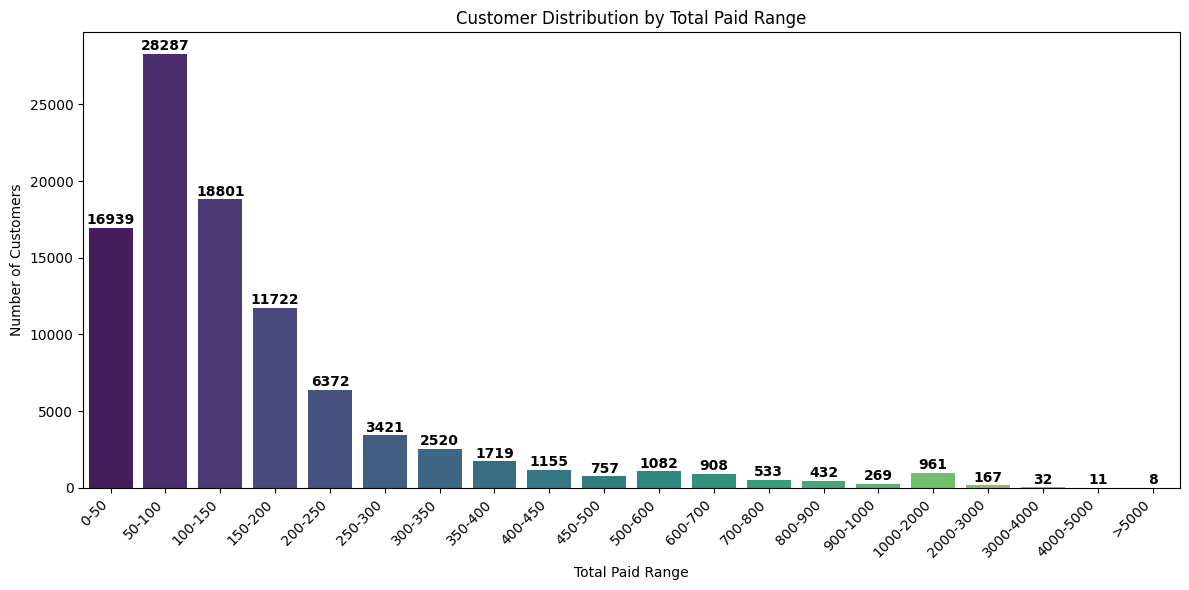

In [13]:
# Create bins for total_paid
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, float('inf')]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 2)] + ['>5000']

customers['total_paid_range'] = pd.cut(customers['total_paid'], bins=bins, labels=labels, right=False)


# Count number of customers in each range
customer_count_by_range = customers['total_paid_range'].value_counts(dropna=False).sort_index()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=customer_count_by_range.index, y=customer_count_by_range.values, palette='viridis')
plt.title('Customer Distribution by Total Paid Range')
plt.xlabel('Total Paid Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the count
for i, v in enumerate(customer_count_by_range.values):
    ax.text(i, v + 500, str(v), ha='center', va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

Based on the graph above, it's evident that 28,287 customers fall into the expenditure range of 50-100 units of currency. The next largest segment comprises 18,801 customers spending between 100 and 150 units of currency, followed by 16,939 customers in the 0-50 range. This distribution highlights that the majority of customers tend to spend lower amounts, particularly between 0 and 150 units of currency.

### Consumer Distribution by The Number of Order and Top 10 Customer by The Number of Order

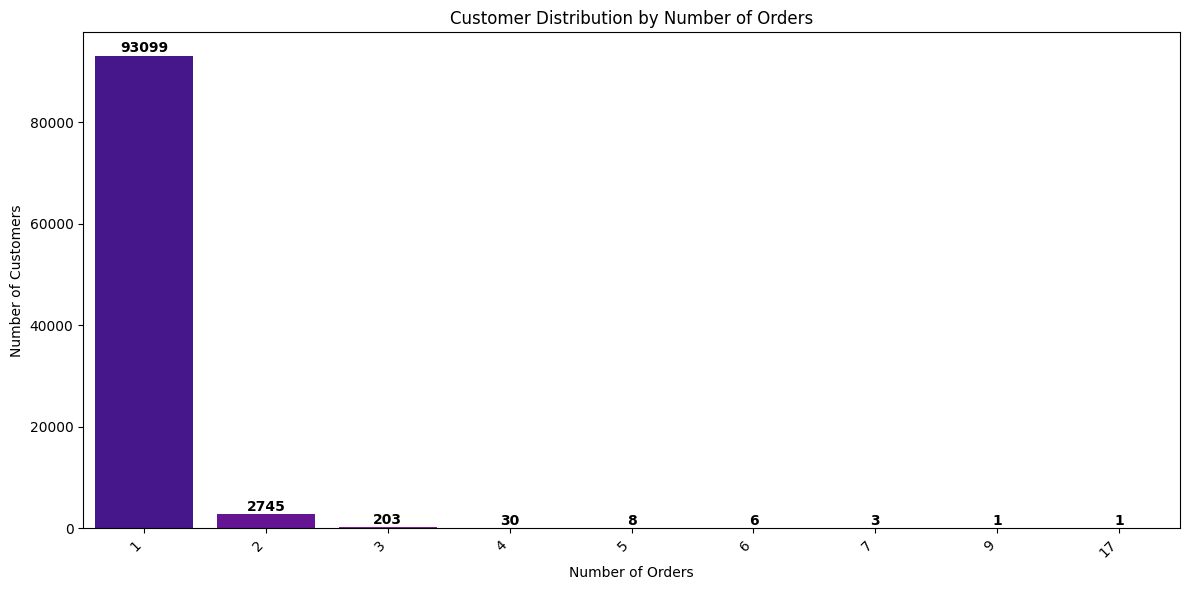

,customer_unique_id,total_paid,order_count,customer_city,customer_state
1329,8d50f5eadf50201ccdcedfb9e2ac8455,927.63,17,sao paulo,SP
841,3e43e6105506432c953e165fb2acf44c,1172.66,9,praia grande,SP
927,ca77025e7201e3b30c44b472ff346268,1122.72,7,recife,PE
1336,1b6c7548a2a1f9037c1fd3ddfed95f33,925.62,7,ituiutaba,MG
2070,6469f99c1f9dfae7733b25662e7f1782,758.83,7,santos,SP
2707,de34b16117594161a6a89c50b289d35a,660.94,6,santo andre,SP
46210,12f5d6e1cbf93dafd9dcc19095df0b3d,110.72,6,curitiba,PR
3894,f0e310a6839dce9de1638e0fe5ab282a,540.69,6,vitoria,ES
1738,63cfc61cee11cbe306bff5857d00bfe4,826.32,6,rio de janeiro,RJ
972,dc813062e0fc23409cd255f7f53c7074,1094.63,6,garanhuns,PE


In [14]:
# Count number of customers in each range
customer_count_by_order = customers['order_count'].value_counts(dropna=False).sort_index()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=customer_count_by_order.index, y=customer_count_by_order.values, palette='plasma')
plt.title('Customer Distribution by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the count
for i, v in enumerate(customer_count_by_order.values):
    ax.text(i, v + 1500, str(v), ha='center', va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Display the sorted DataFrame
customers.sort_values(by='order_count', ascending=False)[['customer_unique_id', 'total_paid', 'order_count', 'customer_city', 'customer_state']].head(10)

Based on the data, the most frequent order, with a count of 17, was made by customer 8d50f5eadf50201ccdcedfb9e2ac8455 from Sao Paulo. These top 10 customers represent the highest frequency scores observed in the dataset.

### Distribution by Payment Method

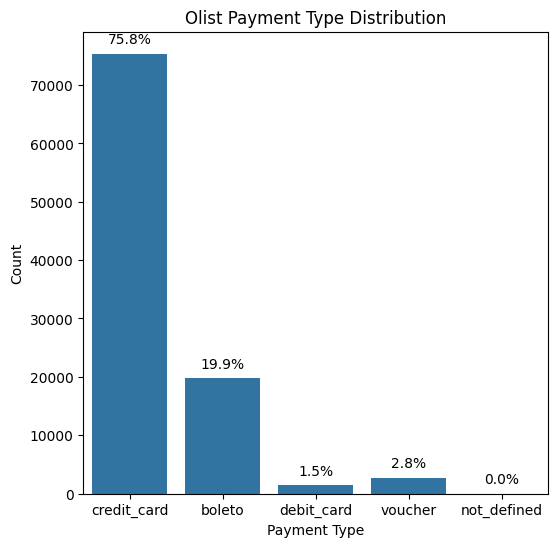

In [15]:
plt.figure(figsize=(6, 6))
ax =sns.countplot(x='payment_type', data=df_train)

# Annotate the count on the bars
total = len(df_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Olist Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

Credit card is the preferred payment method among customers, with 75.8% of customers using it for transactions.

### Top 10 State by The Number of Order

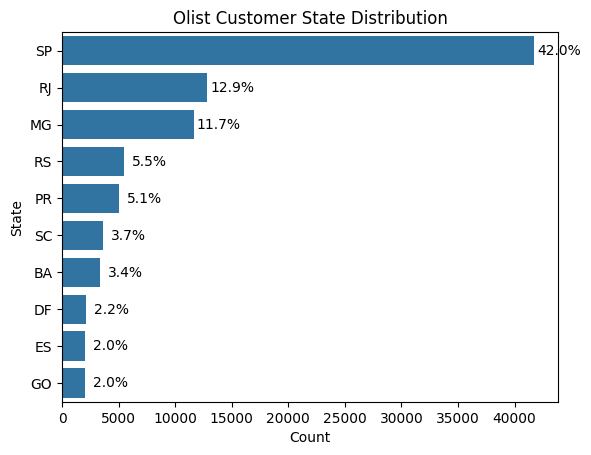

In [16]:
top_orders_cities = df_train.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)

#plt.figure(figsize=(15, 6))
ax = sns.barplot(x="order_id", y="customer_state", data=top_orders_cities[:10])

# Annotate the count on the bars
total = top_orders_cities["order_id"].sum()  # Total orders

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 1000  # Adjust position horizontally
    y = p.get_y() + p.get_height() / 2  # Center vertically
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(10, 0), textcoords='offset points')
    
plt.title('Olist Customer State Distribution')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

We observe that the most common state among customers is São Paulo (SP) with 42.19% of customers, followed by Rio de Janeiro (RJ) at 13.02% and Minas Gerais (MG) at 11.6%. These states are located in the southeast region of Brazil. Additionally, there is significant sales activity in Rio Grande do Sul (RS), Paraná (PR), and Santa Catarina (SC), which are states from the southern region.

## III.CUSTOMER SEGMENTATION

### RECENCY

To calculate recency, we start by identifying the most recent purchase date for each customer and then compute the number of days they have been inactive since that date. This approach helps us quantify how recent or current each customer's activity is. Following this, we will utilize K-means clustering to assign customers a recency score based on their period of inactivity.

In [17]:
# Ensure 'order_purchase_timestamp' is in datetime format
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])

# Get the max purchase date for each customer and create a dataframe with it
max_purchase = df_train.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
max_purchase.columns = ['customer_unique_id', 'max_purchase_date']

# We take our observation point as the max purchase date in our dataset
max_purchase['recency'] = (max_purchase['max_purchase_date'].max() - max_purchase['max_purchase_date']).dt.days

# Merge this dataframe to our new user dataframe
customers = pd.merge(customers, max_purchase[['customer_unique_id','recency']], on='customer_unique_id')

# Display the data sort by the recency
customers.sort_values(by='recency', ascending=True)[['customer_unique_id', 'total_paid', 'order_count', 'customer_city', 'customer_state', 'recency', 'order_purchase_timestamp']]

,customer_unique_id,total_paid,order_count,customer_city,customer_state,recency,order_purchase_timestamp
5269,262e1f1e26e92e86375f86840b4ffd63,444.06,2,picos,PI,0,2018-06-11 16:51:47
55549,87ab9fec999db8bd5774917de3cdf01c,89.71,1,sorocaba,SP,0,2018-10-17 17:30:18
3395,af5454198a97379394cacf676e1e96cb,592.65,3,registro,SP,13,2018-08-10 10:39:43
29115,634420a0ea42302205032ed44ac7fccc,160.76,2,pirai,RJ,16,2018-08-16 13:09:43
36403,9bb92bebd4cb7511e1a02d5e50bc4655,137.03,1,guarulhos,SP,18,2018-09-29 09:13:03
...,...,...,...,...,...,...,...
46675,0eb1ee9dba87f5b36b4613a65074337c,109.34,1,sao paulo,SP,744,2016-10-02 22:07:52
96094,830d5b7aaa3b6f1e9ad63703bec97d23,0.00,1,sao joaquim da barra,SP,762,2016-09-15 12:16:38
84959,009b0127b727ab0ba422f6d9604487c7,40.95,1,sao jose dos campos,SP,764,2016-09-13 15:24:19
36687,b7d76e111c89f7ebf14761390f0f7d17,136.23,1,boa vista,RR,772,2016-09-04 21:15:19


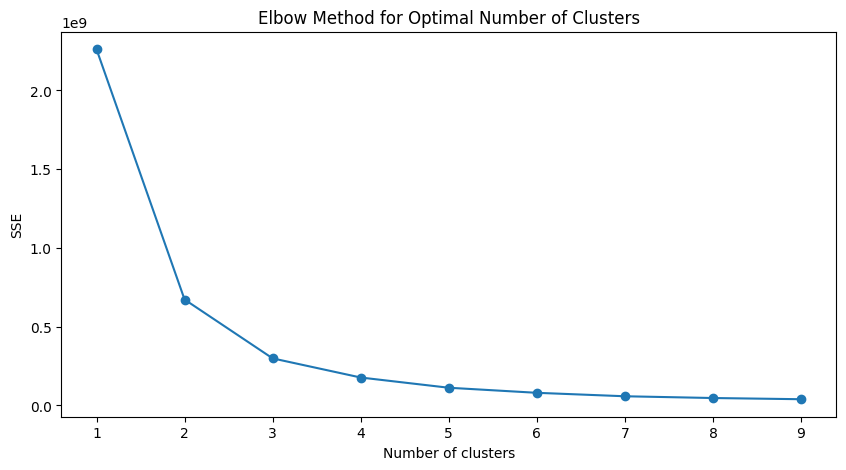

In [18]:
from sklearn.cluster import KMeans

# Initializing dictionary to store
sse = {}

# Extracting 'recency' data from the customer
recency = customers[['recency']].copy()

# Calculating SSE for different values of k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(recency)
    sse[k] = kmeans.inertia_

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

Here, it appears that 4 is the optimal number of clusters. Depending on our business requirements, we have the flexibility to proceed with fewer or more clusters. In this case, we will select 5 clusters.

Next, we will fit a new clustering model with 4 clusters based on recency and incorporate these recency labels into the customer data.

In [19]:
#building 5 clusters for recency and adding it to dataframe
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers[['recency']])
customers['recency_cluster'] = kmeans.predict(customers[['recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customers = order_cluster('recency_cluster', 'recency',customers,False)

# Display the data after we add recency_cluster
customers[['customer_unique_id', 'total_paid', 'order_count', 'customer_city', 'customer_state', 'recency', 'recency_cluster']].head(6)

,customer_unique_id,total_paid,order_count,customer_city,customer_state,recency,recency_cluster
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,1,rio de janeiro,RJ,383,1
1,46450c74a0d8c5ca9395da1daac6c120,9553.02,3,florianopolis,SC,60,4
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63,2,araruama,RJ,564,0
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,1,vila velha,ES,94,4
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,campo grande,MS,611,0
5,459bef486812aa25204be022145caa62,6922.21,1,vitoria,ES,83,4


In [20]:
customers.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,11703.0,563.176365,49.418113,498.0,523.0,557.0,593.0,772.0
1,15457.0,432.284531,34.993275,374.0,401.0,431.0,461.0,497.0
2,22878.0,313.506076,31.398549,260.0,284.0,317.0,335.0,373.0
3,25480.0,204.104553,31.731479,152.0,176.0,204.0,232.0,259.0
4,20578.0,97.414618,28.196432,0.0,72.0,93.0,122.0,151.0


### FREQUENCY
To create frequency clusters, we will calculate the total number of orders for each customer using the `order_count` variable we previously generated. Subsequently, we will categorize customers into different clusters based on this frequency.

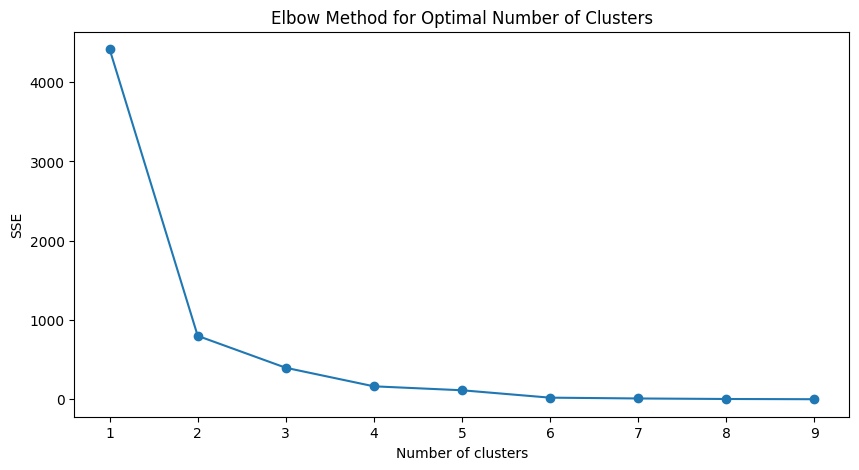

In [21]:

# Initializing dictionary to store
sse = {}

# Extracting 'freqency' data from the customer by using order_count
frequency = customers[['order_count']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(frequency)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

Based on the analysis, it seems that 4 is the optimal number of clusters, therefore we will proceed with using 4 clusters.

Next, we will fit a new clustering model with 4 clusters based on frequency and incorporate these frequency labels into the customer data.

In [22]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers[['order_count']])
customers['frequency_cluster'] = kmeans.predict(customers[['order_count']])

#order the frequency cluster
customers = order_cluster('frequency_cluster', 'order_count',customers,True)

#see details of each cluster
customers.groupby('frequency_cluster')['order_count'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,93099.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,2745.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,233.0,3.128755,0.335650,3.0,3.0,3.0,3.0,4.0
3,19.0,6.473684,2.756173,5.0,5.0,6.0,6.5,17.0


### MONETARY

To create monetary clusters, we will calculate the total number of money spending for each customer using the `total_paid` variable we previously generated. Subsequently, we will categorize customers into different clusters based on this frequency.

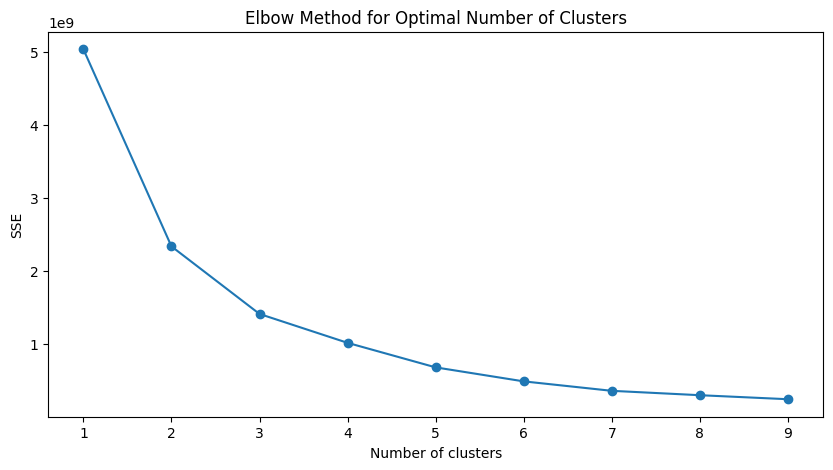

In [23]:
sse = {}
monetary = customers[['total_paid']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(monetary)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

Based on the analysis, it seems that 6 is the optimal number of clusters, therefore we will proceed with using 6 clusters.

Next, we will fit a new clustering model with 6 clusters based on frequency and incorporate these frequency labels into the customer data.

In [24]:
#k-means
kmeans = KMeans(n_clusters=6)
kmeans.fit(customers[['total_paid']])
customers['monetary_cluster'] = kmeans.predict(customers[['total_paid']])

#order the frequency cluster
customers = order_cluster('monetary_cluster', 'total_paid',customers,True)

#see details of each cluster
customers.groupby('monetary_cluster')['total_paid'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,59601.0,73.102573,32.003088,0.00,46.760,69.94,98.9700,136.71
1,27700.0,200.929866,51.181141,136.72,159.030,188.28,232.8125,333.17
2,6612.0,466.889377,111.068966,333.34,371.635,432.35,546.8025,738.19
3,1773.0,1012.121782,221.387955,738.53,826.290,940.65,1166.4300,1575.05
4,396.0,2141.183838,526.823218,1583.71,1759.205,2023.29,2317.4525,4175.26
5,14.0,6613.830000,2535.083395,4445.50,4702.420,6404.10,7188.4875,13664.08


### OVERALL ANALYSIS

In [25]:
# Display the data after recency_cluster has been added
customers[['customer_unique_id', 'total_paid', 'order_count', 'customer_city', 'customer_state', 'recency_cluster', 'frequency_cluster', 'monetary_cluster']].head()

,customer_unique_id,total_paid,order_count,customer_city,customer_state,recency_cluster,frequency_cluster,monetary_cluster
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,1,rio de janeiro,RJ,1,0,5
1,46450c74a0d8c5ca9395da1daac6c120,9553.02,3,florianopolis,SC,4,2,5
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63,2,araruama,RJ,0,1,5
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,1,vila velha,ES,4,0,5
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,campo grande,MS,0,0,5


In [26]:
#renaming columns
customers_segmented = customers[['customer_unique_id', 'recency', 'recency_cluster', 'order_count', 'frequency_cluster', 'total_paid', 'monetary_cluster']]
customers_segmented.rename(columns={'order_count': 'frequency', 'total_paid': 'monetary'}, inplace=True)

customers_segmented.head()

,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,monetary,monetary_cluster
0,0a0a92112bd4c708ca5fde585afaa872,383,1,1,0,13664.08,5
1,46450c74a0d8c5ca9395da1daac6c120,60,4,3,2,9553.02,5
2,da122df9eeddfedc1dc1f5349a1a690c,564,0,2,1,7571.63,5
3,763c8b1c9c68a0229c42c9fc6f662b93,94,4,1,0,7274.88,5
4,dc4802a71eae9be1dd28f5d788ceb526,611,0,1,0,6929.31,5


Now that we have scores for recency, frequency, and monetary, we can proceed to define each customer segmentation based on the descriptions created earlier. Here are the details:

* **Best Customers**: High frequency, high monetary, low recency.
* **High-spending New Customers**: Low frequency, high monetary, low recency.
* **Lowest-Spending Active Loyal Customers**: High frequency, low monetary, low recency.
* **Churned Best Customers**: High frequency, high monetary, high recency.

Based on our segmentation approach, to determine whether a score is high or low, we use the median value. Scores above the median are categorized as high, while those below are categorized as low. Here are the details:

#### Frequency 
* High : score more then or equal to 2 (2 and 3)
* Low : score less then 2 (0 and 1)

#### Monetary
* High : score more then or equal 3 (3,4, and 5)
* Low : score less then 3 (0,1, and 2)

### Recency
* High : score more then or equal 3 (3 and 4)
* Low : score less then  3 (0,1, and 2)

In [27]:
# Define the conditions and corresponding segment names
conditions = [
    (customers_segmented['recency_cluster'] >= 3) & (customers_segmented['frequency_cluster'] >= 2) & (customers_segmented['monetary_cluster'] >= 3),
    (customers_segmented['recency_cluster'] < 3) & (customers_segmented['frequency_cluster'] < 2) & (customers_segmented['monetary_cluster'] >= 3),
    (customers_segmented['recency_cluster'] < 3) & (customers_segmented['frequency_cluster'] >= 2) & (customers_segmented['monetary_cluster'] < 3),
    (customers_segmented['recency_cluster'] >= 3) & (customers_segmented['frequency_cluster'] >= 2) & (customers_segmented['monetary_cluster'] >= 3)
]

choices = [
    'Best Customers',
    'High-spending New Customers',
    'Lowest-Spending Active Loyal Customers',
    'Churned Best Customers'
]

# Create the 'Segment' column based on the conditions and choices
customers_segmented['Segment'] = np.select(conditions, choices, default='Other')

# Display the first 10 rows to verify the result
customers_segmented.head(10)


,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,monetary,monetary_cluster,Segment
0,0a0a92112bd4c708ca5fde585afaa872,383,1,1,0,13664.08,5,High-spending New Customers
1,46450c74a0d8c5ca9395da1daac6c120,60,4,3,2,9553.02,5,Best Customers
2,da122df9eeddfedc1dc1f5349a1a690c,564,0,2,1,7571.63,5,High-spending New Customers
3,763c8b1c9c68a0229c42c9fc6f662b93,94,4,1,0,7274.88,5,Other
4,dc4802a71eae9be1dd28f5d788ceb526,611,0,1,0,6929.31,5,High-spending New Customers
5,459bef486812aa25204be022145caa62,83,4,1,0,6922.21,5,Other
6,ff4159b92c40ebe40454e3e6a7c35ed6,510,0,1,0,6726.66,5,High-spending New Customers
7,4007669dec559734d6f53e029e360987,327,2,1,0,6081.54,5,High-spending New Customers
8,5d0a2980b292d049061542014e8960bf,97,4,1,0,4809.44,5,Other
9,eebb5dda148d3893cdaf5b5ca3040ccb,546,0,1,0,4764.34,5,High-spending New Customers


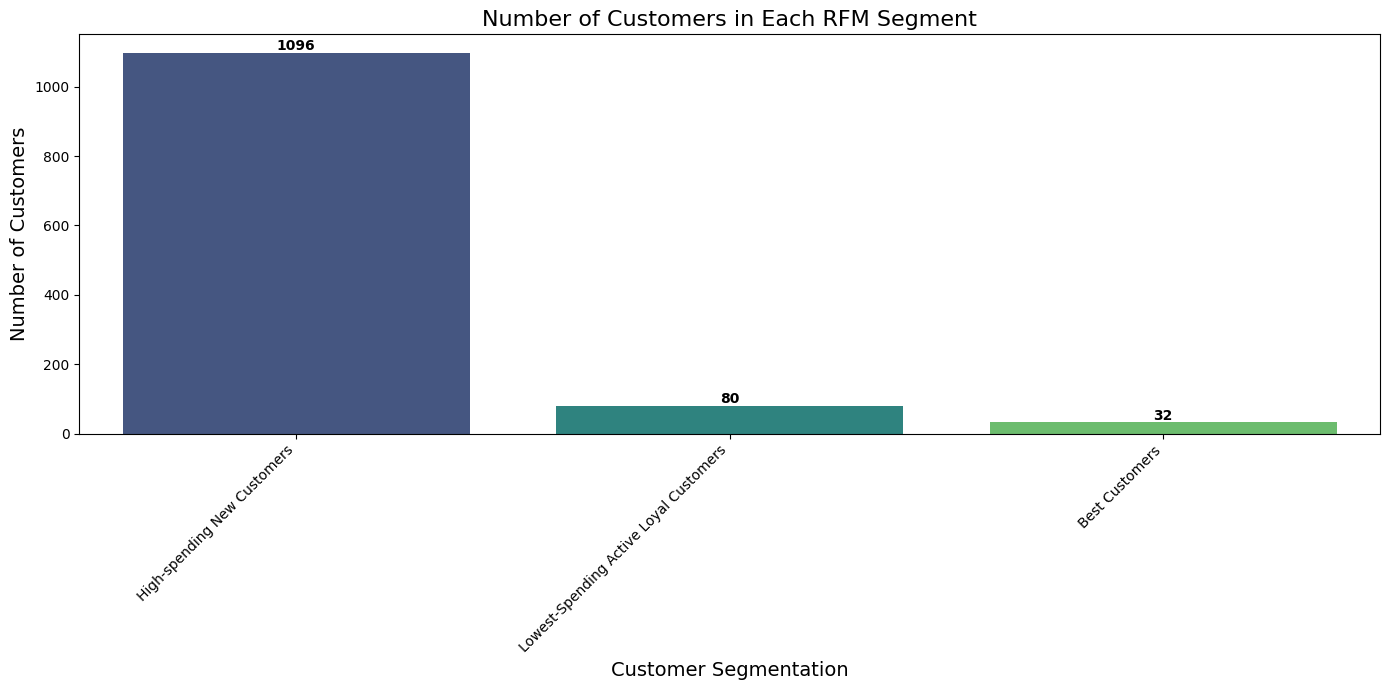

In [28]:
# Count the number of customers in each detailed RFM segment excluding 'Other'
segment_counts = customers_segmented[customers_segmented['Segment'] != 'Other']['Segment'].value_counts()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Customer Segmentation', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Number of Customers in Each RFM Segment', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the number of customers
for i, v in enumerate(segment_counts.values):
    plt.text(i, v + 20, str(v), ha='center', va='center', fontweight='bold', color='black')
    
# Show the plot
plt.tight_layout()
plt.show()

We identified 1079 High-spending New Customers, 84 Lowest-Spending Active Loyal Customers, and 29 Best Customers. Interestingly, there were no Churned Best Customers, possibly due to the requirement that customers in this segment must have transacted frequently and spent significantly, but haven’t done so in a long time. The Olist dataset covers only the period from 2016 to 2018, which spans just 2 years. Nevertheless, these insights provide valuable segmentation details. Additionally, exploring further combinations of recency, frequency, and monetary scores could reveal additional meaningful segments for deeper analysis.

## CONCLUSION

In this analysis of the Olist dataset, our primary goal was to gain insights into customer segmentation using recency, frequency, and monetary (RFM) scores. The dataset provided a comprehensive view of customer transactions, including order details, payment information, and customer reviews, spanning the years 2016 to 2018. Our initial exploration revealed a diverse customer base across different regions of Brazil, with São Paulo (SP) being the most predominant state, followed by Rio de Janeiro (RJ) and Minas Gerais (MG).

Our analysis revealed distinct customer segments based on transaction behaviors. Notably, we identified 1079 High-spending New Customers, 84 Lowest-Spending Active Loyal Customers, and 29 Best Customers. Interestingly, we found no instances of Churned Best Customers, likely due to the dataset's limited two-year timeframe. This segmentation highlights opportunities for targeted marketing strategies aimed at increasing engagement and spending among various customer segments.

